In [1]:
import numpy as np
import ndlib
import matplotlib.pyplot as plt
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
import random
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
%matplotlib inline

no display found. Using non-interactive Agg backend


In [2]:
# Caricamento del grafo dal file .edges
graph_path = r'E:\Gianluca\Master Big Data Pisa\Corsi\Social Network Analysis\SNA\cit-HepTh\cit-HepTh.edges'
G = nx.DiGraph()

with open(graph_path, 'r') as f:
    next(f)
    for line in f:
        parts = line.strip().split()
        node1 = int(parts[0])
        node2 = int(parts[1])
        # Aggiunta dell'arco al grafo
        G.add_edge(node1, node2)

In [3]:
print(G)

DiGraph with 22908 nodes and 2444798 edges


In [4]:
G_cc = list(nx.weakly_connected_components(G))
G_GC = nx.subgraph(G, max(G_cc, key=len))

In [5]:
print(G_GC)

DiGraph with 22721 nodes and 2444642 edges


# Task
Simulare il modello di opinion dynamics (a classi continue) Algoritmic Bias su un
sample (connesso) di 1000 nodi del grafo selezionato (utilizzando NDlib) e studiarne
i trend al variare del valore dei parametri epsilon e gamma. Discutere i risultati
ottenuti e fornire, ove possibile, la descrizione di un potenziale fenomeno - relativo ai
dati selezionati - che possa essere catturato da diverse configurazioni del modello.


In [6]:
random.seed(42)
sampled_nodes = random.sample(list(G_GC.nodes()), 1260)
subgraph = G_GC.subgraph(sampled_nodes)
subgraph_cc = list(nx.weakly_connected_components(subgraph))
max([len(c) for c in subgraph_cc])

1005

In [7]:
subgraph_GC = nx.subgraph(G, max(subgraph_cc, key=len)).to_undirected()
print(subgraph_GC)

Graph with 1005 nodes and 8644 edges


In [8]:
subgraph_GC = nx.convert_node_labels_to_integers(subgraph_GC, label_attribute="actual_label")

In [ ]:
model = op.AlgorithmicBiasModel(subgraph_GC)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.9)
config.add_model_parameter("gamma", 1)  
model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(15000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


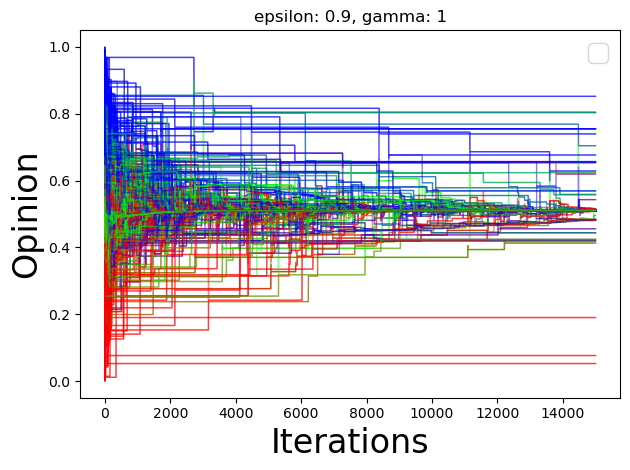

In [20]:
viz = OpinionEvolution(model, iterations)
viz.plot()

In [21]:
g = nx.complete_graph(1005)

In [22]:
model = op.AlgorithmicBiasModel(g)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.9)
config.add_model_parameter("gamma", 1)  
model.set_initial_status(config)

# Simulation execution
iterations2 = model.iteration_bunch(1200)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


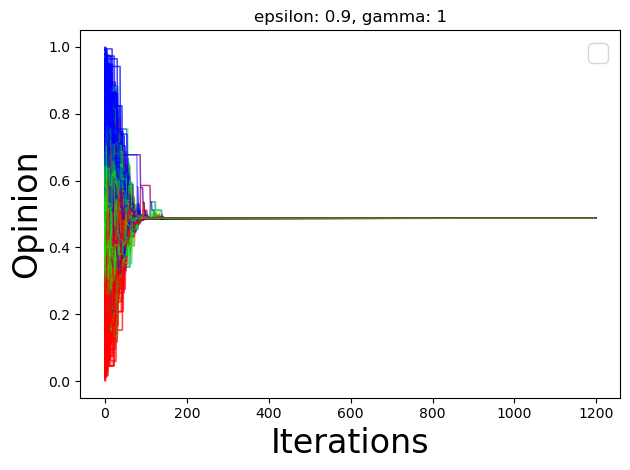

In [23]:
viz = OpinionEvolution(model, iterations2)
viz.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


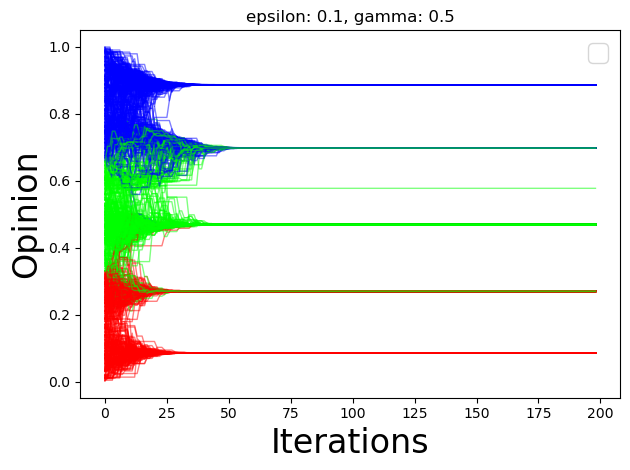

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


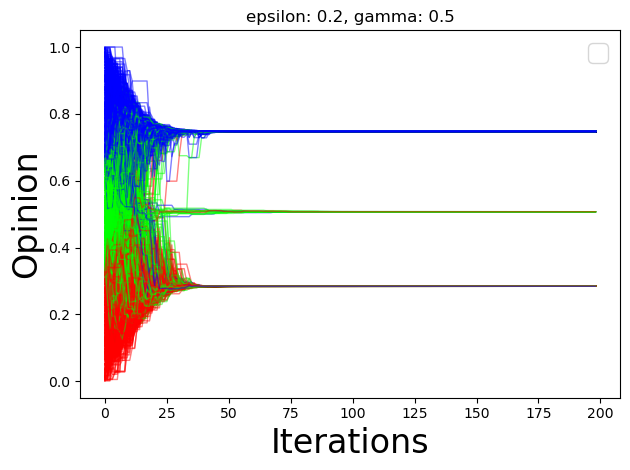

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


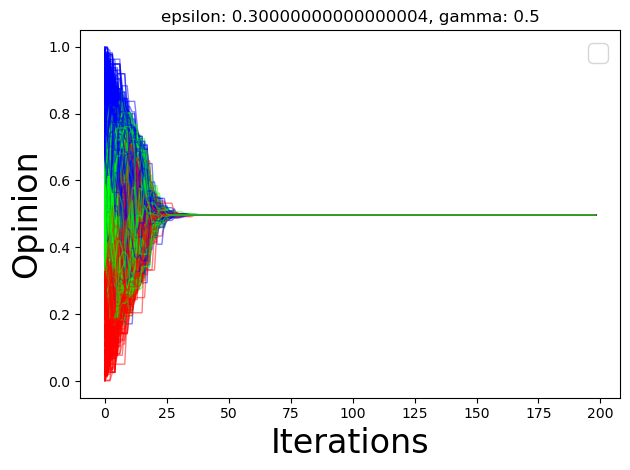

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


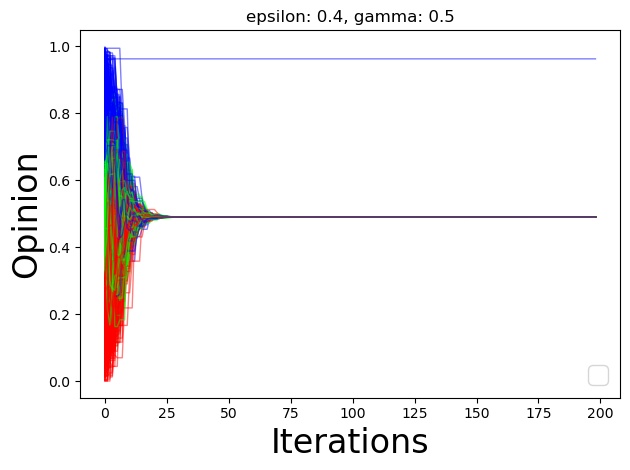

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


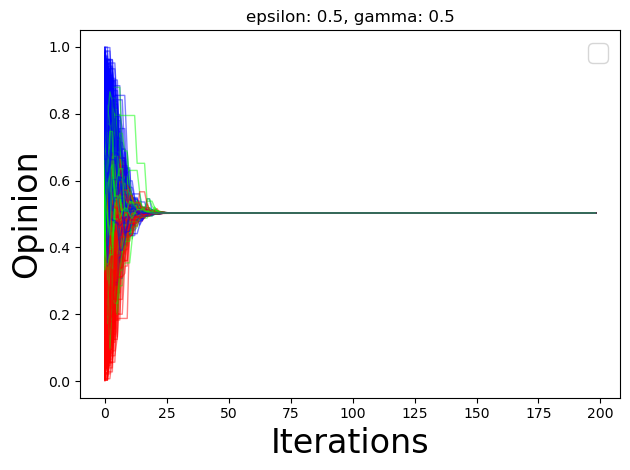

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


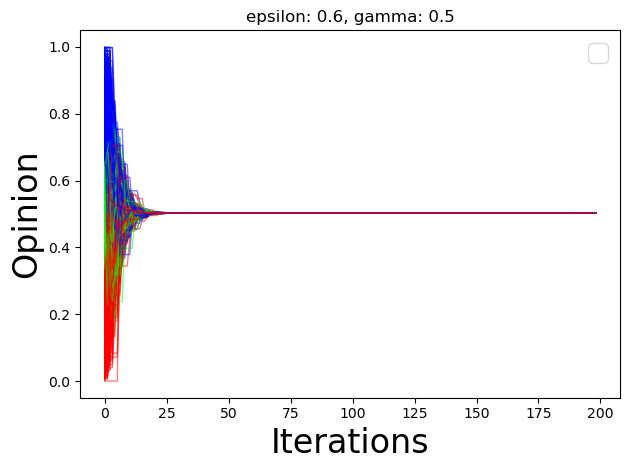

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


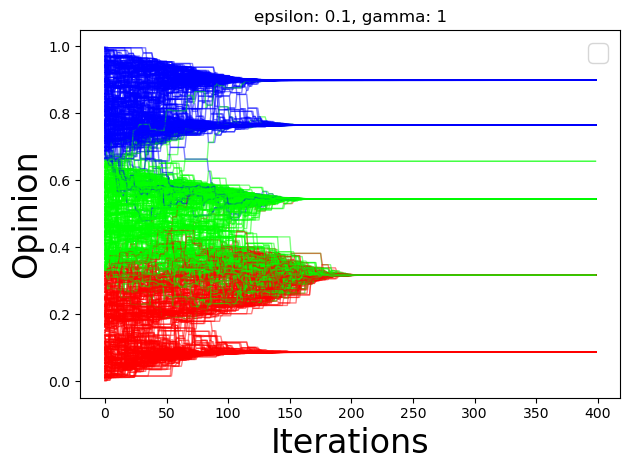

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


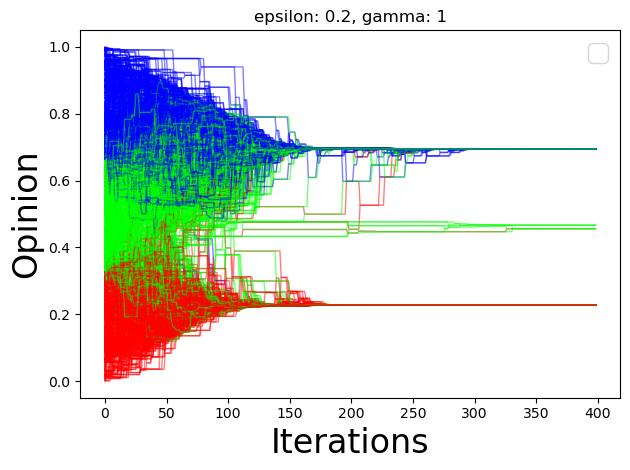

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


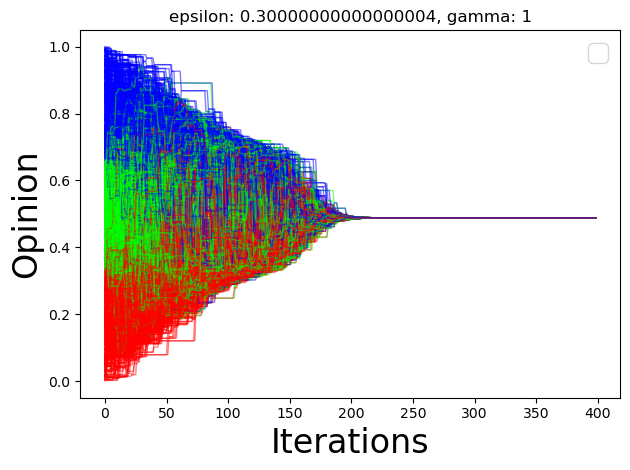

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


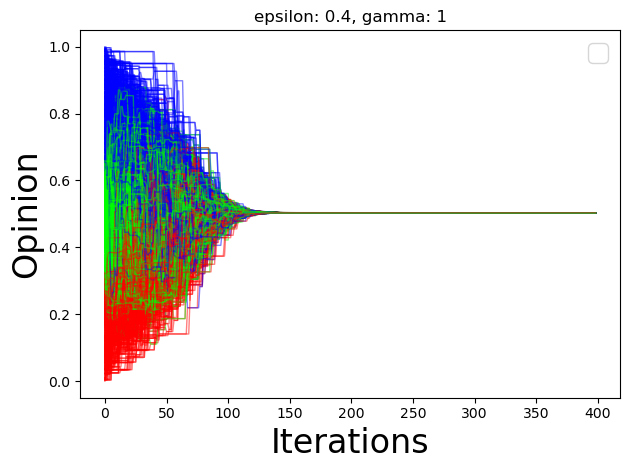

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


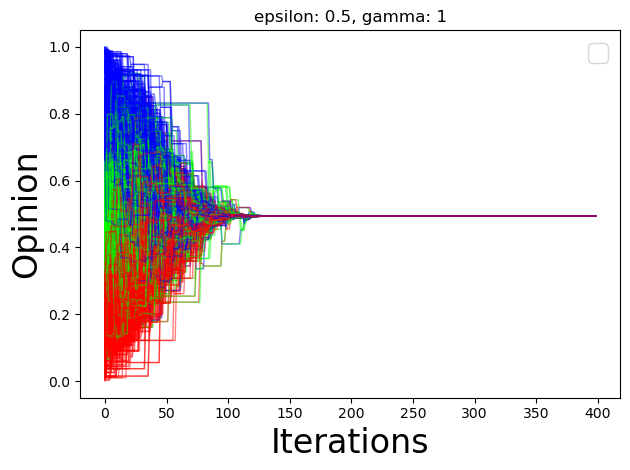

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


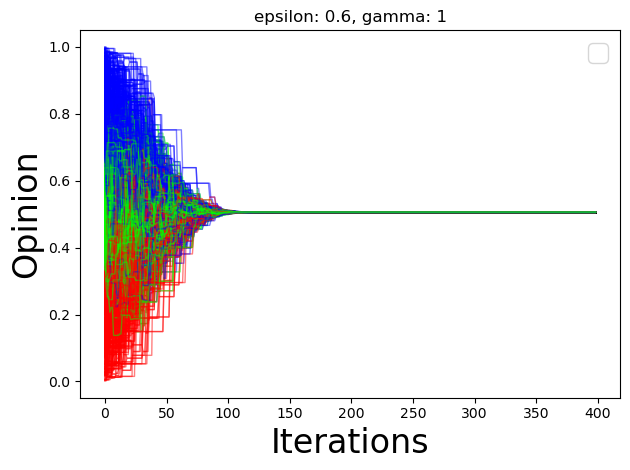

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


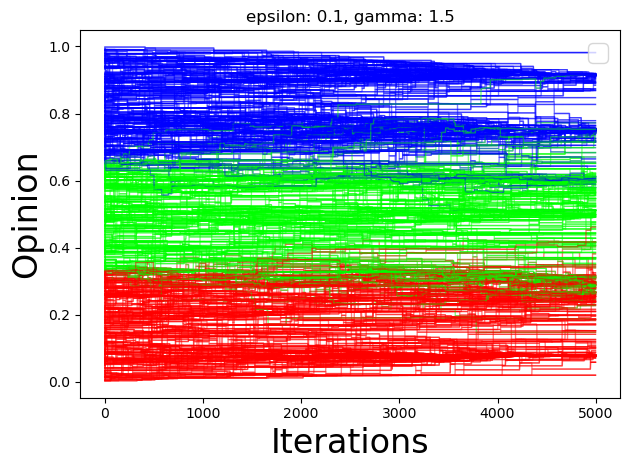

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


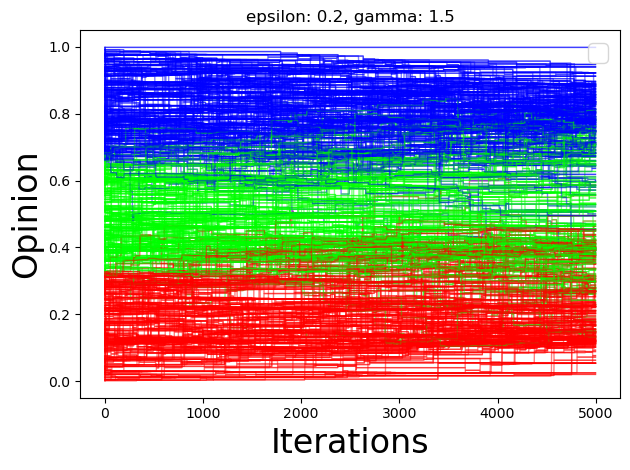

KeyboardInterrupt: 

In [38]:
# Model configuration
for alpha in [0.5, 1, 1.5]:
    for epsilon in np.arange(0.1, 0.7, 0.1):
        model = op.AlgorithmicBiasModel(g)
        config = mc.Configuration()
        config.add_model_parameter("epsilon", epsilon)
        config.add_model_parameter("gamma", alpha)  
        model.set_initial_status(config)
        # Simulation execution
        if alpha != 1.5:
            iterations = model.iteration_bunch(int(400*alpha))
        else:
            iterations = model.iteration_bunch(5000)
        viz = OpinionEvolution(model, iterations)
        viz.plot()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


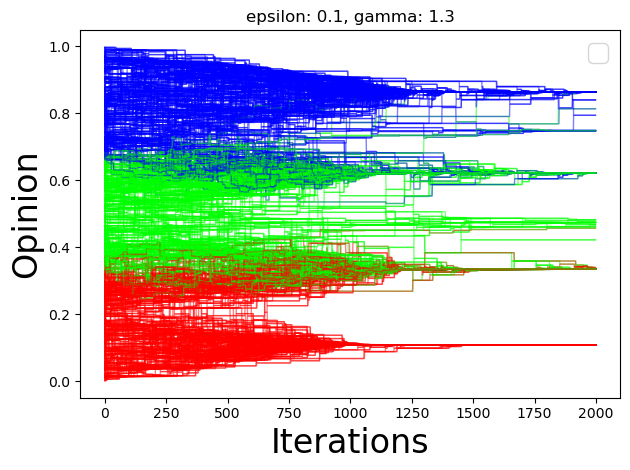

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


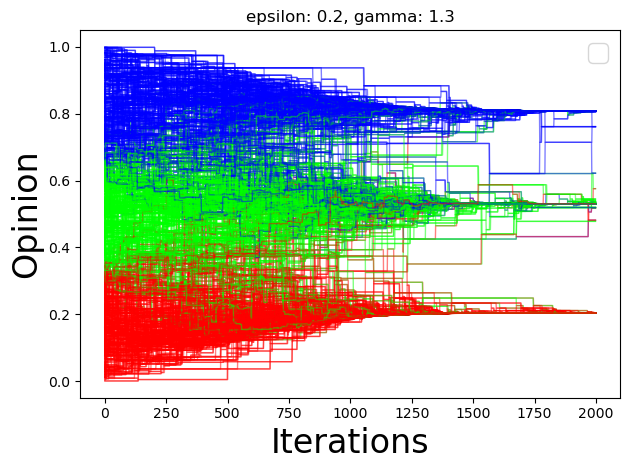

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


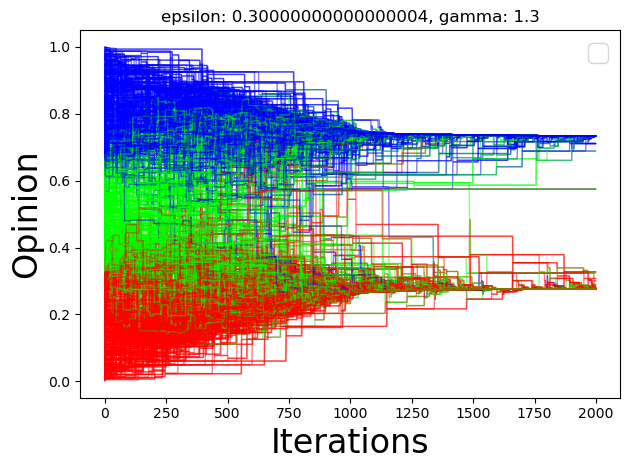

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


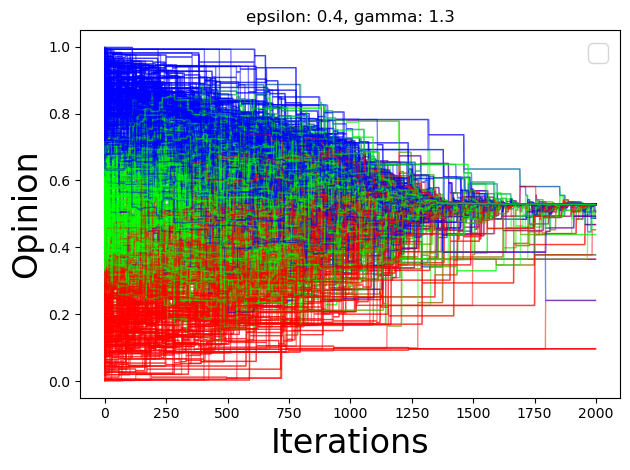

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


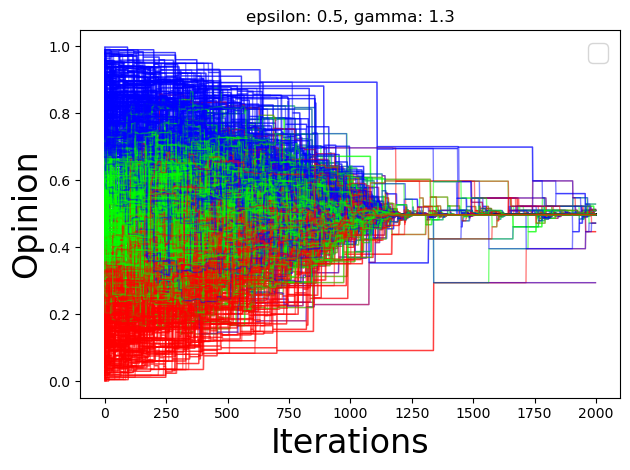

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


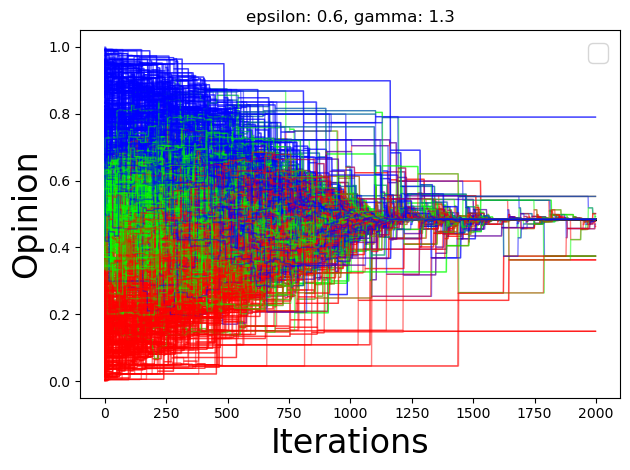

In [40]:
for epsilon in np.arange(0.1, 0.7, 0.1):
        model = op.AlgorithmicBiasModel(g)
        config = mc.Configuration()
        config.add_model_parameter("epsilon", epsilon)
        config.add_model_parameter("gamma", 1.3)  
        model.set_initial_status(config)
        # Simulation execution
        iterations = model.iteration_bunch(2000)
        viz = OpinionEvolution(model, iterations)
        viz.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


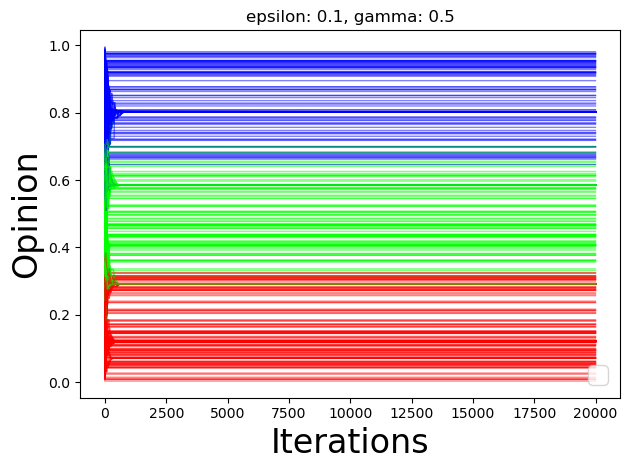

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


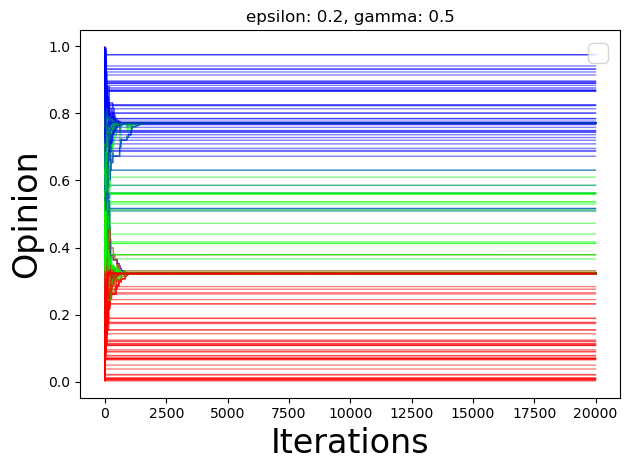

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


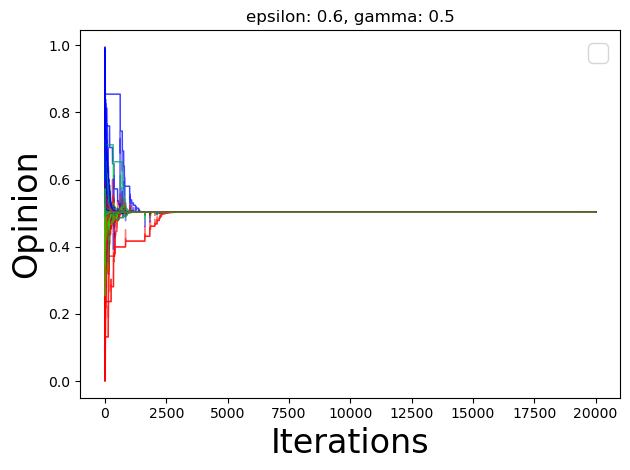

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


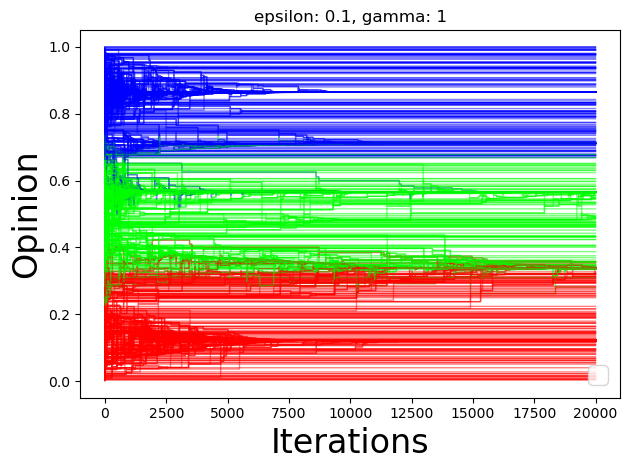

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


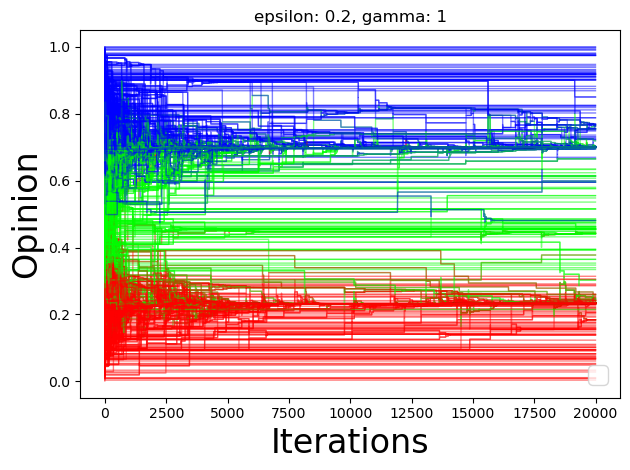

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


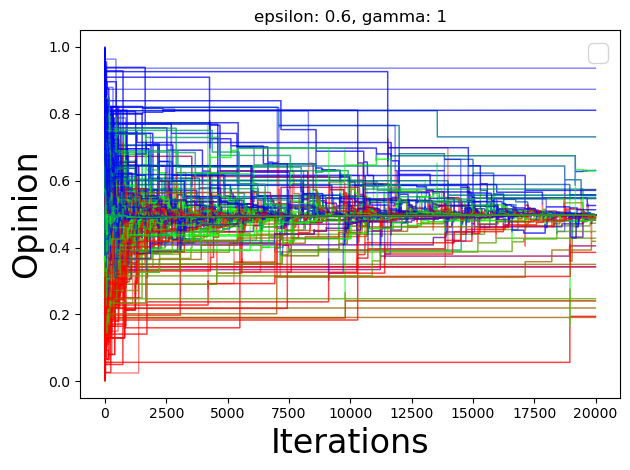

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


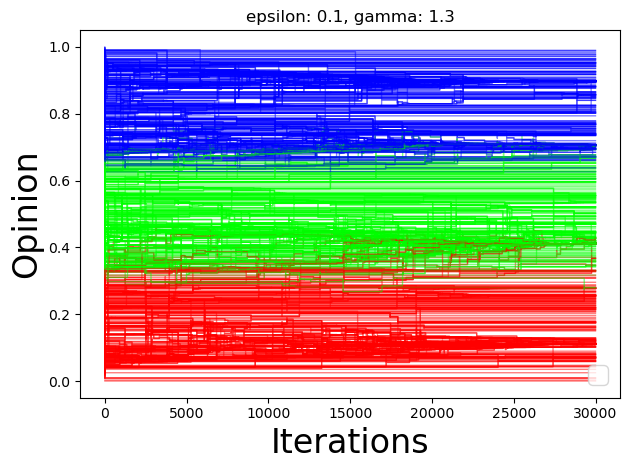

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


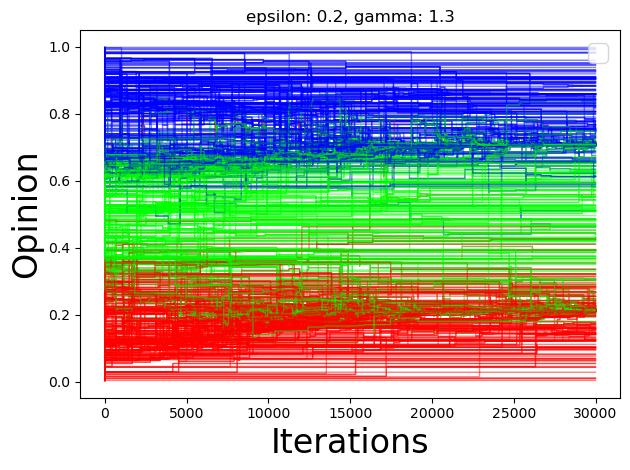

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


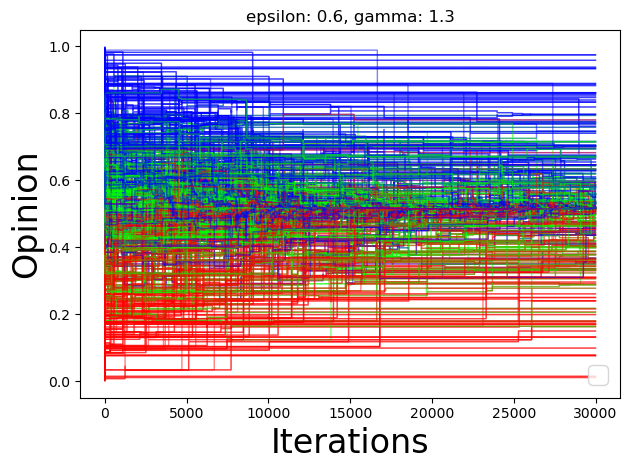

In [9]:
# Model configuration
for alpha in [0.5, 1, 1.3]:
    for epsilon in [0.1, 0.2, 0.6]:
        model = op.AlgorithmicBiasModel(subgraph_GC)
        config = mc.Configuration()
        config.add_model_parameter("epsilon", epsilon)
        config.add_model_parameter("gamma", alpha)  
        model.set_initial_status(config)
        # Simulation execution
        if alpha != 1.3:
            iterations = model.iteration_bunch(20000)
        else:
            iterations = model.iteration_bunch(30000)
        viz = OpinionEvolution(model, iterations)
        viz.plot()